In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib import dates as dt

In [151]:
files_path = 'D:\\Stations_data\\Bani\\all_months_copy'
os.chdir(files_path)

In [152]:
df = pd.read_csv('till_january.csv', delimiter = ',')
df['date'] = pd.to_datetime(df['date'], format = '%d.%m.%Y %H:%M:%S')

In [153]:
#time_min = df['date'].min()
#print(time_min)
#time_max = df['date'].max()
#print(time_max)

In [154]:
df = df.set_index('date')

In [155]:
#df = df.resample('60T')

In [156]:
sensor_available_mask = df.loc[:, ['S1counts', 'S2counts', 'S3counts', 'S4counts', 'S5counts',
                                  'S6counts', 'S7counts', 'S8counts', 'S9counts', 'S10counts']]
#sensor_available_mask.values

In [157]:
#fig = plt.figure()
#ax = fig.add_subplot(111)
#ax = ax.xaxis_date()
#ax = plt.hlines(df[sensor_available_mask].values, time_min, time_max )

In [178]:
df_copy = df.loc[:, ['S1counts', 'S2counts', 'S3counts', 'S4counts', 'S5counts', 'S6counts',
          'S7counts', 'S8counts', 'S9counts', 'S10counts']]
df_copy

,S1counts,S2counts,S3counts,S4counts,S5counts,S6counts,S7counts,S8counts,S9counts,S10counts
date,,,,,,,,,,
2020-03-10 15:13:50,14121.0,12463.0,12491.0,14044.0,11154.0,11295.0,12482.0,11894.0,15030.0,13563.0
2020-03-10 15:23:50,14122.0,12463.0,12492.0,14045.0,11157.0,11295.0,12482.0,11894.0,15031.0,13562.0
2020-03-10 15:33:50,14123.0,12463.0,12491.0,14045.0,11160.0,11296.0,12482.0,11894.0,15031.0,13562.0
2020-03-10 15:43:50,14124.0,12463.0,12491.0,14044.0,11164.0,11297.0,12482.0,11894.0,15032.0,13562.0
2020-03-10 15:53:50,14124.0,12463.0,12491.0,14044.0,11166.0,11298.0,12482.0,11895.0,15032.0,13563.0
...,...,...,...,...,...,...,...,...,...,...
2021-01-28 14:28:39,14186.0,12669.0,12421.0,13538.0,12684.0,13422.0,11450.0,11039.0,NaN,13791.0
2021-01-28 14:38:39,14186.0,12670.0,12421.0,13537.0,12684.0,13422.0,11450.0,11040.0,NaN,13791.0
2021-01-28 14:48:39,14186.0,12669.0,12420.0,13537.0,12684.0,13422.0,11451.0,11040.0,NaN,13791.0


In [179]:
good_range = []
for i in df_copy:
    col = df[i]
    sensors = col.name
    
    start_mark = (col.notnull() & col.shift().isnull())
    start = col[start_mark].index
    
    end_mark = (col.notnull() & col.shift(-1).isnull())
    end = col[end_mark].index
    
    for s, e in zip(start, end):
        good_range.append((sensors, s, e))
        
good_ranges = pd.DataFrame(good_range, columns = ['sensors', 'start', 'end'])
#good_ranges.loc[['S1counts', 'S2counts', 'S3counts', 'S4counts', 'S5counts', 'S6counts', 'S7counts',
#               'S8counts', 'S9counts', 'S10counts']]

In [180]:
#myFmt = dt.DateFormatter('%Y-%m-%d')
#fig = plt.figure(figsize = (25, 20))
#ax = fig.add_subplot(111)
#ax.xaxis.set_major_formatter(myFmt)
#ax = ax.xaxis.set_major_locator(dt.WeekdayLocator(interval =1))
#ax = dt.autofmt_xdate()
#ax = ax.set(xlabel = 'Date', ylabel = 'Sensors', title = "Bani Available data for sensors")
#ax = plt.hlines(good_ranges['sensors'], dt.date2num(good_ranges['start']), dt.date2num(good_ranges['end']))
#ax = plt.set_title('Bani Data Availability')
#fig.tight_layout()

In [161]:
#good_ranges['sensor_groups'] = good_ranges.groupby(by=['sensors'])

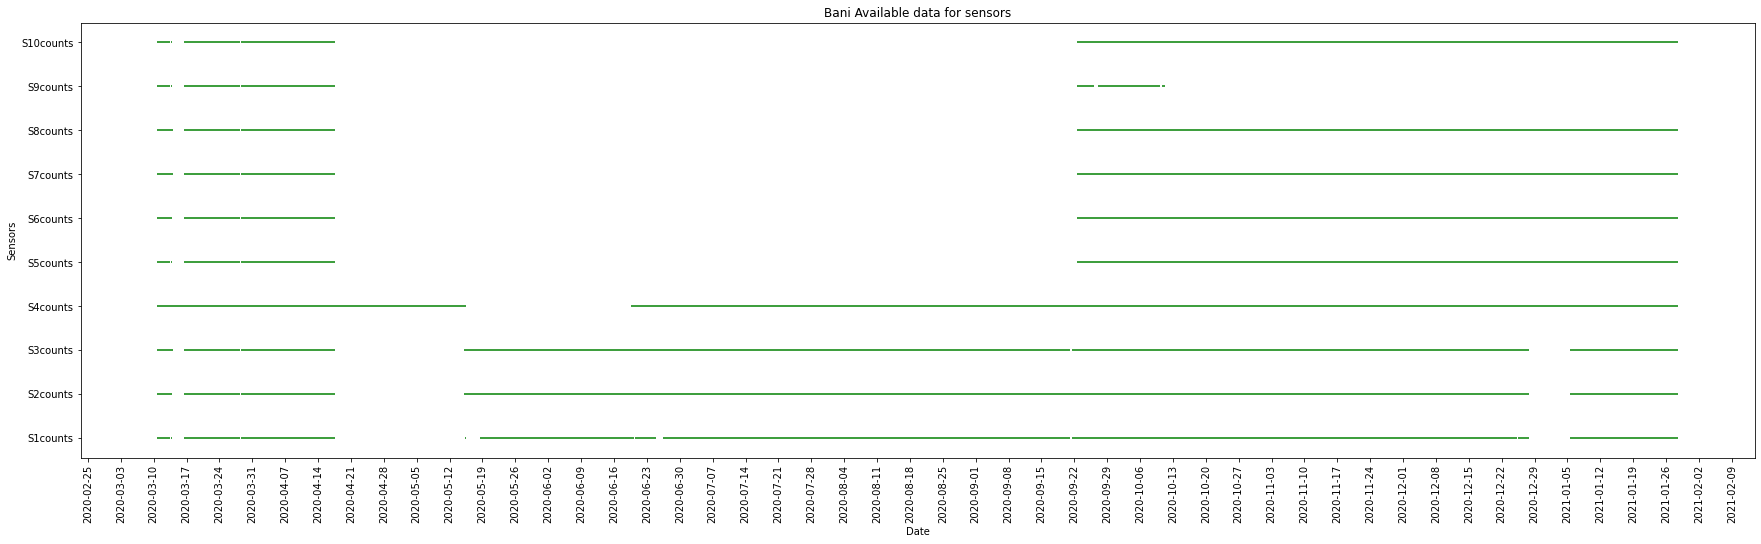

In [182]:
myFmt = dt.DateFormatter('%Y-%m-%d')
fig, ax = plt.subplots(figsize=(30, 8))
ax.set(xlabel = 'Date', ylabel = 'Sensors', title = "Bani Available data for sensors")
ax.xaxis.set_major_formatter(myFmt)
plt.xticks(rotation = 90)
#ax.set_xticklabels(xlabels, Rotation = 90)
ax.xaxis.set_major_locator(dt.WeekdayLocator(interval=1))
#ax.xaxis.major_formatter(dt.MonthLocator())
ax = plt.hlines(good_ranges['sensors'], dt.date2num(good_ranges['start']), dt.date2num(good_ranges['end']), color = 'green')
plt.savefig('Bani_data_availability.png')